<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/Drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date Geographic Region Platform Marketing Channel  Visits  \
0  2017-01-01      Geo Region 1  Desktop         Channel 1    3011   
1  2017-01-01      Geo Region 1  Desktop         Channel 2  119684   
2  2017-01-01      Geo Region 1  Desktop         Channel 3   25612   
3  2017-01-01      Geo Region 1  Desktop         Channel 4    3115   
4  2017-01-01      Geo Region 1  Desktop         Channel 5    5657   

   Qualified Shoppers  Bounced Visits  Gross Orders  Net Orders  \
0                1878             811          1139         957   
1               82504           26541         12489       10369   
2               11828            7398          1399        1139   
3                1463            1393            69          50   
4                4307            1346           641         517   

   Net Room Nights  
0             1848  
1            19897  
2             2257  
3               81  
4              921  
# of features: 19, # of coefficients: 19
         

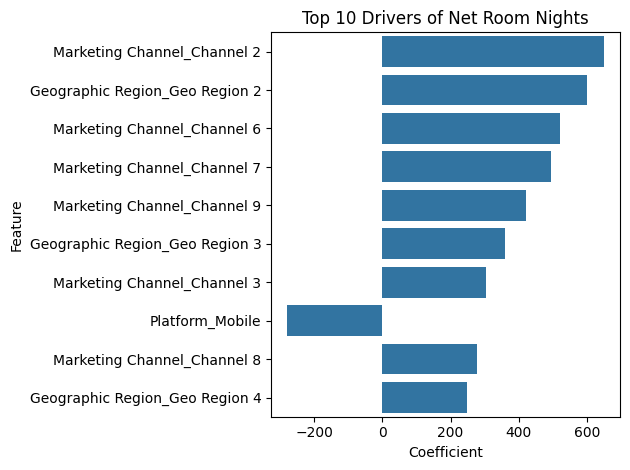

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")
print(df.head())


# Drop 'Date' and set target variable
X = df.drop(columns=["Net Room Nights", "Date"])
y = df["Net Room Nights"]

# Define categorical and numerical features
categorical_cols = ["Geographic Region", "Platform", "Marketing Channel"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]


# Preprocessor for categorical features
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
], remainder='passthrough')

# Full pipeline with linear regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get feature names
encoded_features = pipeline.named_steps['preprocessor'].get_feature_names_out()
all_features = list(encoded_features) + numerical_cols

# Get coefficients
coefficients = pipeline.named_steps['regressor'].coef_

# Get encoded feature names for categorical variables
encoded_cats = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)

# Combine with numerical column names (passed through)
all_features = list(encoded_cats) + numerical_cols

# Check shape before creating DataFrame
print(f"# of features: {len(all_features)}, # of coefficients: {len(coefficients)}")

# Now create the DataFrame
coef_df = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Show top 10
print(coef_df.head(10))


# Plot
sns.barplot(x="Coefficient", y="Feature", data=coef_df.head(10))
plt.title("Top 10 Drivers of Net Room Nights")
plt.tight_layout()
plt.show()
